In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv('clustering_data.csv',sep=',')
X

,Alcohol,OD280/OD315
0,14.23,3.92
1,13.20,3.40
2,13.16,3.17
3,14.37,3.45
4,13.24,2.93
...,...,...
173,13.71,1.74
174,13.40,1.56
175,13.27,1.56
176,13.17,1.62


In [2]:
X.rename(columns = {'OD280/OD315':'Protein'}, inplace = True) 
X

,Alcohol,Protein
0,14.23,3.92
1,13.20,3.40
2,13.16,3.17
3,14.37,3.45
4,13.24,2.93
...,...,...
173,13.71,1.74
174,13.40,1.56
175,13.27,1.56
176,13.17,1.62


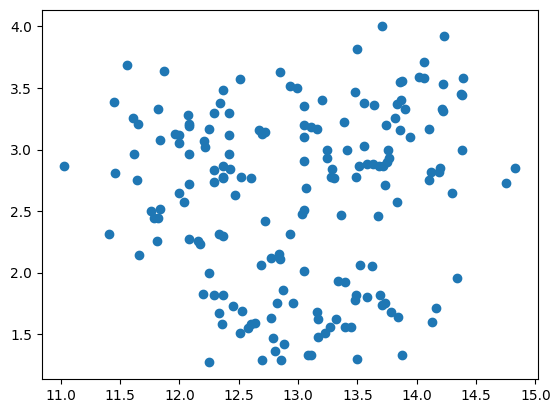

In [3]:
# fig = plt.figure()
# ax = fig.add_subplot()

# scatter = ax.scatter(X.Alcohol,X.Protein)
plt.scatter(X.Alcohol, X.Protein)

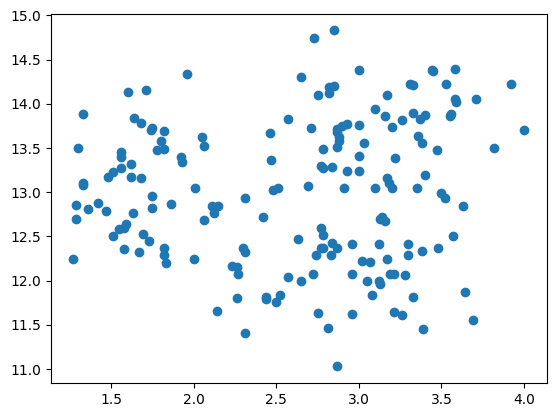

In [4]:
fig = plt.figure()
ax = fig.add_subplot()

scatter2 = ax.scatter(X.Protein, X.Alcohol)

## K-Means

In [5]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Choosing Correct Value of K - Elbow method

In [6]:
distortion = []

K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortion.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])

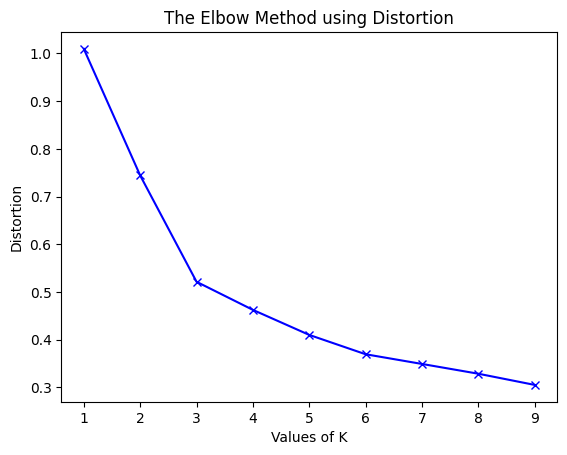

In [7]:
plt.plot(K,distortion, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### Implementation

In [8]:
model = KMeans(n_clusters = 3)
model.fit(X)
print(model.labels_)
print(model.cluster_centers_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 1 1 1 2 1 0 1 0 2 2 2
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[13.07413793  1.73741379]
 [12.07981818  2.90290909]
 [13.71415385  3.14538462]]


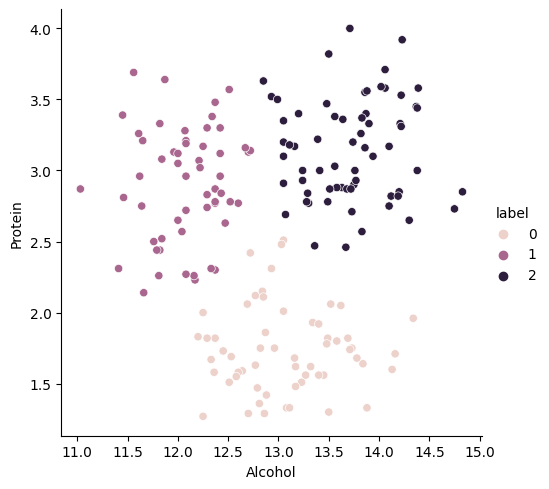

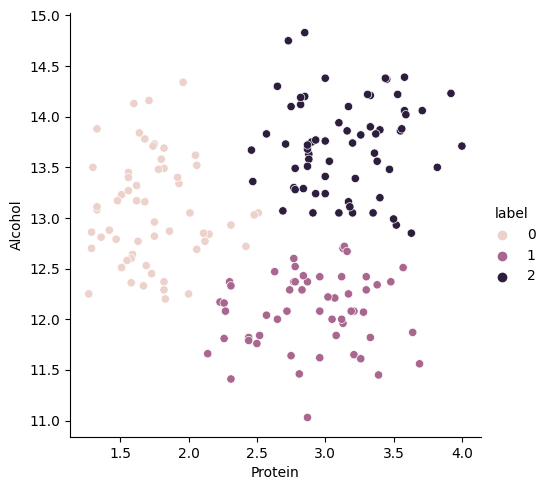

In [9]:
X['label'] = 0
for i, row in X.iterrows():
    X.at[i,'label'] = model.labels_[i]
sns.relplot(x = 'Alcohol', y = 'Protein', hue= 'label', data=X)
sns.relplot(x = 'Protein', y = 'Alcohol', hue= 'label', data=X)

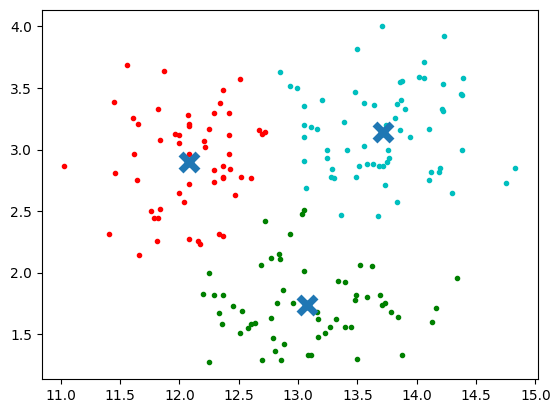

In [10]:
colors = ["g.", "r.","c."]
for i, row in X.iterrows():
    plt.plot(row.Alcohol, row.Protein, colors[model.labels_[i]])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="x", s = 150, linewidths = 5, zorder = 10)

In [11]:
X

,Alcohol,Protein,label
0,14.23,3.92,2
1,13.20,3.40,2
2,13.16,3.17,2
3,14.37,3.45,2
4,13.24,2.93,2
...,...,...,...
173,13.71,1.74,0
174,13.40,1.56,0
175,13.27,1.56,0
176,13.17,1.62,0


In [12]:
X[X['label'] == 0]

,Alcohol,Protein,label
37,13.05,2.51,0
59,12.37,1.82,0
60,12.33,1.67,0
61,12.64,1.59,0
68,13.34,1.93,0
70,12.29,1.82,0
76,13.03,2.48,0
83,13.05,2.01,0
92,12.69,2.06,0
107,12.72,2.42,0


In [13]:
print(X[X['label'] == 0].shape)
print(X[X['label'] == 1].shape)
print(X[X['label'] == 2].shape)

(58, 3)
(55, 3)
(65, 3)
